# Potential and Field

In the previous notebook, you explored the effects and properties of the vector operations ***divergence***, ***gradient***, and ***curl***.  In this notebook, you will use these operations to explore relations between the electric field, the electrostatic potential, and the charge density.


## Zero Curl

Consider the following electric field:
$$
\vec{E} = (2xy^2 + z^3) \, \hat{\mathbf{e}}_x
        + (2x^2y) \, \hat{\mathbf{e}}_y
        + (3xz^2) \, \hat{\mathbf{e}}_z
$$

Show that $\nabla \times \vec{E} = 0$.

Adapt the methods of the previous notebook to do the following:

1. Define the vector field $\vec{E}$ on a 3D grid.
2. Plot $\vec{E}$.
3. Compute the curl, $\nabla \times \vec{E}$, on the same grid.
4. Demonstrate that $\nabla \times \vec{E} \approx 0$.

For Part 4, do not simply compute the curl.  You may not obtain strict equality in part 4 due to numerical error and edge effects, but you should provide some quantitative evidence that the curl is nearly zero nearly everywhere.

<IPython.core.display.Javascript object>


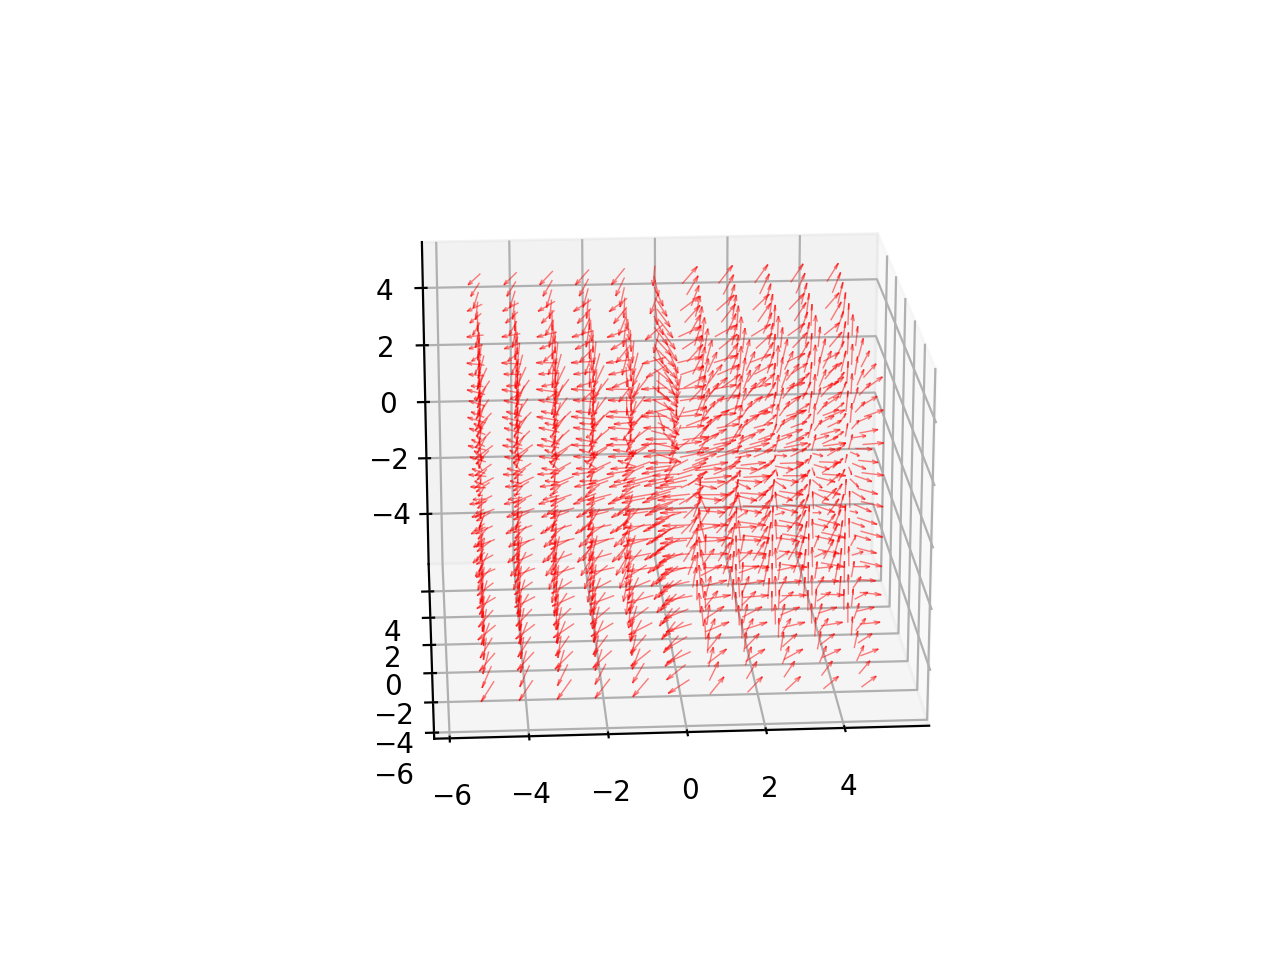

<IPython.core.display.Javascript object>


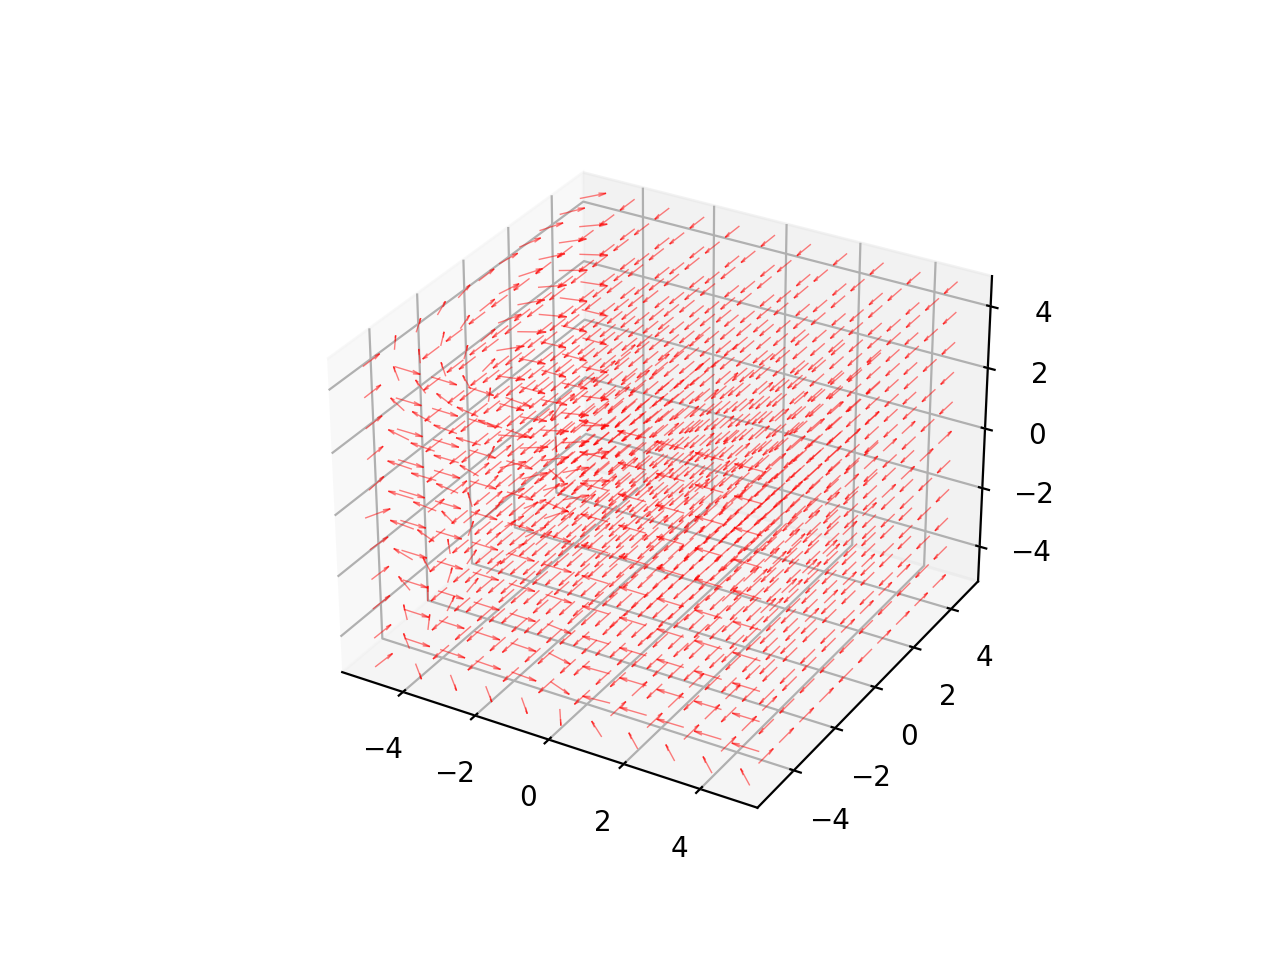

The number of points in the field that are close to zero are 33817640 points.
The total number of points in the field are 50923779 points.
66.41% is the pecentage of the curled electric field that is zero.


In [2]:
# Import functions.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import VectorCalculus as vc
import Electrodynamics as ed

## Use this command to turn ON interactive plots:
%matplotlib notebook

## Use this command to turn OFF interactive plots.
# %matplotlib inline

# Not sure if these are needed... code runs fine without...
from importlib import reload
reload(vc)
reload(ed)

# Define coordinate grid.
num_points = 257
box_size = 5

# Store coordinate arrays.
X,Y,Z = ed.coordinates(L=box_size, N=num_points)

# Compute grid spacing.
ds = X[1,0,0] - X[0,0,0]

# Define electric field.
Fx = 2*X * Y**2 + Z
Fy = 2*X**2 * Y
Fz = 3*X * Z**2
F = np.stack([Fx, Fy, Fz])

# Compute the curl.
dF = vc.curl(F,ds)

# Plot electric field.
ed.draw_vector_field(X,Y,Z,*F)

# Plot curl of electric field.
ed.draw_vector_field(X,Y,Z,*dF)

# Count points on field that are close to zero
true = np.isclose(dF,0,1,0.1)
zeros= true.sum()
print("The number of points in the field that are close to zero are",zeros,"points.")

# Count total points in array
total = np.size(dF)
print("The total number of points in the field are",total,"points.")

# Find percentage of points that are zero
percent = 100*(zeros/total)
percent_rounded = "{:.2f}".format(percent)
print(percent_rounded+'%',"is the pecentage of the curled electric field that is zero.")

## Gradient

Find the potential.

Since the curl of $\vec{E}$ is zero, we can write $\vec{E}$ as the gradient of a function $\phi$:
$$\nabla \times \vec{E} = 0 \qquad \implies \qquad \vec{E} = -\nabla \phi$$

Determine a function $\phi(x,y,z)$ whose gradient is $\vec{E}$.

1. Derive the scalar field $\phi$.  Use any method you like: pencil and paper, trial and error, symbolic computing, etc.
2. Define the scalar field $\phi$ on a 3D grid.
3. Plot a slice of $\phi$ for some constant $z$-values of your choice.
4. Compute the gradient, $\nabla \phi$, on the same grid.
5. Compare $-\nabla\phi$ and the original field $\vec{E}$.  Demonstrate that $\vec{E} \approx - \nabla \phi$.

For Part 5, do not simply compute the gradient.  You may not obtain strict equality due to numerical error and edge effects, but you should provide some quantitative evidence that the gradient of the function you chose is nearly equal to $\vec{E}$ nearly everywhere.

The number of points in the field that are close to their electric field values are 43753783 points.
The total number of points in the field are 50923779 points.
85.92% of the points in the negative gradient of potential are close to that of the electric field.


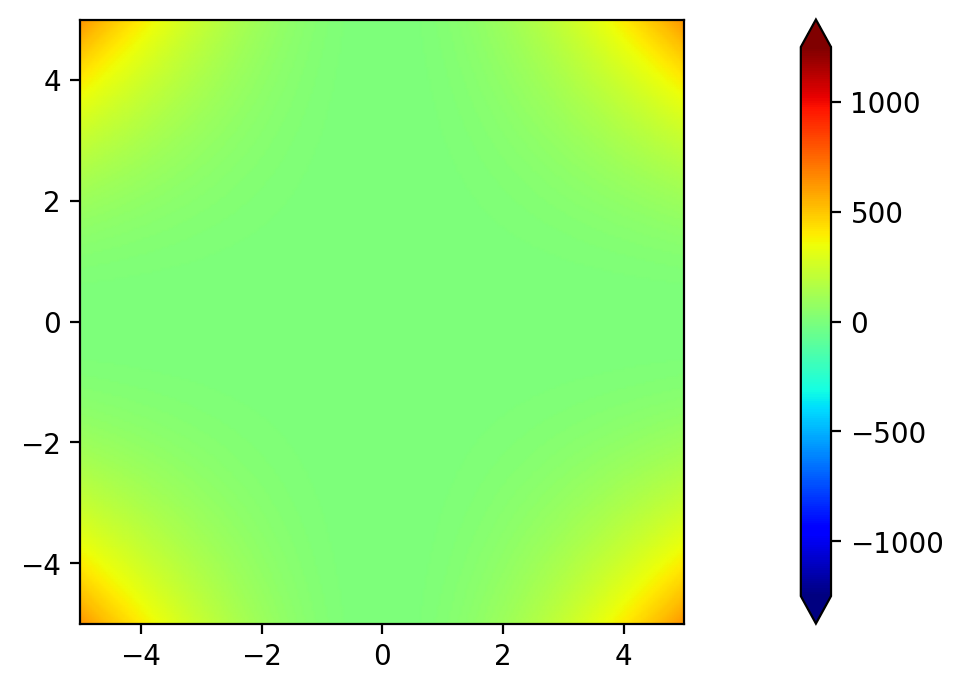

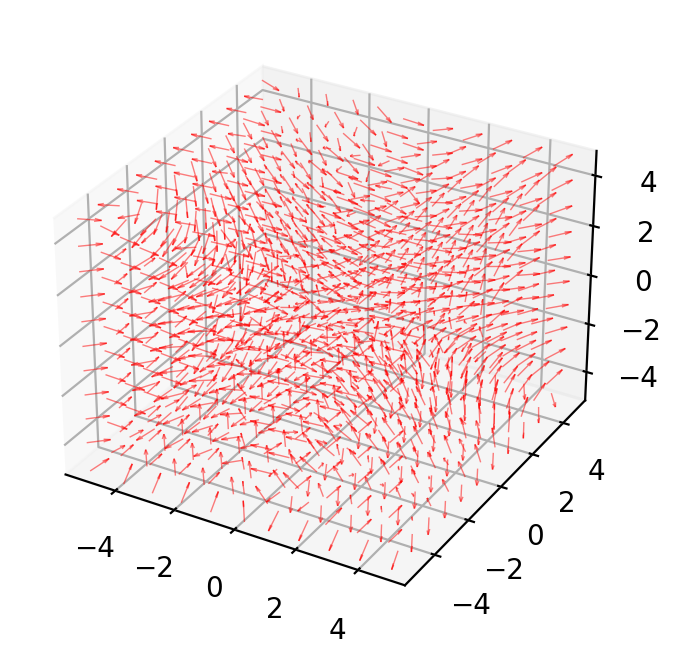

In [112]:
# Not sure how to show that I derived the scalar field, 
# but I worked backwards from the definition of the gradient 
# and found that the fucntion below satisfies the condition.

# Define a function in 3D.
f = X**2*Y**2+X*Z**3
# Compute its gradient.
df = vc.grad(f,ds,)

# Draw a slice of the function.
ed.draw_scalar_field(X,Y,Z,f, cutoff=f.max())

# Draw the resulting vector field.
ed.draw_vector_field(X,Y,Z,*df)

# Count points on field that are close to their electric field values
true = np.isclose(df,F,1,0.1)
elec_field = true.sum()
print("The number of points in the field that are close to their electric field values are",elec_field,"points.")

# Count total points in array
total = np.size(df)
print("The total number of points in the field are",total,"points.")

# Find percentage of points that are zero
percent = 100*(elec_field/total)
percent_rounded = "{:.2f}".format(percent)
print(percent_rounded+'%',"of the points in the negative gradient of potential are close to that of the electric field.")


## Summary and Reflection

Summarize your efforts, insights, and conclusions in the space below.
- What did you find?
- What was difficult?
- How confident are you in your work?
- What questions do you have after working through this exercise?

These exercises taught me how to use some of the numpy functions like np.shape, np.size, and np.isclose. Only about 66% of the points in the first exercise were close to zero, while almost 86% of the points in the negative gradient of potential aligned with the electric field values. 

The most difficult part of this exercise was thinking of way to represent how much of each field aligned with the expected values after the curl or gradient. Luckily I found the np.isclose function, which is exactly what I was looking for.

I feel somewhat doubtful on whether my method for comparing fields is accurate. My numbers used to calculate percentage are not comparing each vector of the newly calculated field to the vectors of the referenced field, but rather are comparing every component of each vector of the newly calculated field to every component of each vector of the referenced field. This explains why the total numbers are so large.

Should the percentages I found be higher?
Do edge effects and numerical errors produce a substantial amount of error in these equations? 